<a href="https://colab.research.google.com/github/nvclon/PythonLabWork/blob/dev/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%22lab_work_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import math
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data['items'][0]['address']

{'city': None,
 'street': None,
 'building': None,
 'lat': None,
 'lng': None,
 'description': None,
 'raw': 'Москва, ул. Введенского, д. 1, м. Калужская',
 'metro': None,
 'metro_stations': [],
 'id': '170835'}

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
vacancies = {}

def get_vacancy(name):
    
    URL = 'https://api.hh.ru/vacancies'

    params = {
        'text': name,
        'area': 1,
        'page': 0,
        'per_page': 100
    }
    data = requests.get(URL, params).json()
    vacancies[name] = data['items']
    sleep(1)
    num_pages = data['pages']
    for i in range(num_pages):
      if i != 0:
        get_vacancy_per_page(name, i)

def get_vacancy_per_page(name, page):
    URL = 'https://api.hh.ru/vacancies'

    params = {
        'text': name,
        'area': 1,
        'page': page,
        'per_page': 100
    }
    data = requests.get(URL, params).json()
    vacancies[name] += data['items']
    sleep(1)

get_vacancy("Врач-нейрохирург")
get_vacancy("Редактор-корректор")
get_vacancy("Детский аниматор")
get_vacancy("Налоговый консультант")
get_vacancy("Официант-бармен")



(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
for key in vacancies.keys():
  print(key, len(vacancies[key]))

Врач-нейрохирург 5
Редактор-корректор 52
Детский аниматор 93
Налоговый консультант 108
Официант-бармен 225


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
    def __init__(self, name, job):
      self.name = name
      self.jobs = [job]

    def add_job(self, job):
      self.jobs += [job]
      

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
companies = dict()
cnt = 0
for name in vacancies.keys():
  for job in vacancies[name]:

    if companies.get(job['employer']['id']) == None:
      companies[job['employer']['id']] = Company(job['employer']['name'], job)
    else:
      companies[job['employer']['id']].add_job(job) 

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
vacancies_with_coords = []
cnt_coords = 0
for company in companies.values():
  for job in company.jobs:
    if not job.get('address') == None:
      if not job['address'].get('lat') == None and job['address']['lat'] != 0.0 and job.get('salary') and job['salary'].get('from') != None and job['address'].get('street') != None:
        vacancies_with_coords += [job]
print(len(vacancies_with_coords))

218


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
vacancies_inside_mkad = []

for vacancy in vacancies_with_coords:
  if (((vacancy['address']['lat'] - 55.7522200) * 63.995) ** 2 + ((vacancy['address']['lng'] - 37.6155600) * 63.995) ** 2) < 13.3 ** 2:
    vacancies_inside_mkad += [vacancy]

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

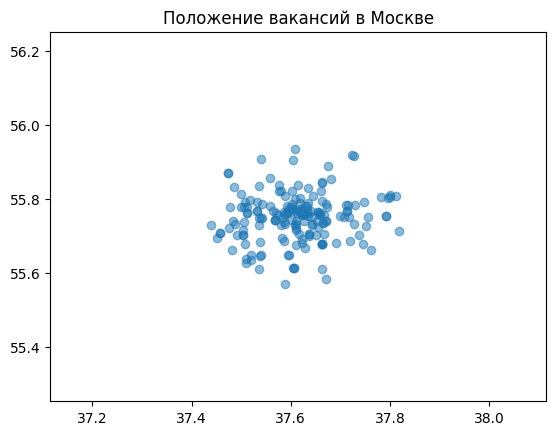

In [ ]:
plt.title('Положение вакансий в Москве')
for vacancy in vacancies_inside_mkad:
  plt.scatter(vacancy['address']['lng'], vacancy['address']['lat'], c = '#1f77b4', alpha = 0.5, edgecolor = '#1f77b4')
plt.axis([37.6155600 - 0.5 , 37.6155600 + 0.5, 55.7522200 - 0.5, 55.7522200 + 0.5])
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [ ]:
vacancies_inside_mkad_needed = []
for vacancy in vacancies_inside_mkad:
  vacancies_inside_mkad_needed += [{'Название' : vacancy['name'], 'Широта' : vacancy['address']['lat'], 'Долгота' : vacancy['address']['lng'], 'Зарплата' : vacancy['salary']['from'], "Улица" : vacancy['address']['street']}]



fig = px.scatter_mapbox(vacancies_inside_mkad_needed, lat="Широта", lon="Долгота", hover_name="Название", hover_data=["Зарплата", "Улица"], zoom=10, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

  Конечно, виден больший спрос в центре Москвы. Это связано с очевидными причинами: большая часть нежилой инфраструктуры сконцентрирована в нем. Даже несмотря на странный выбор профессий (для того, чтобы избавиться от других, неподходящих по названию мест работы), можно заметить более высокие зарплаты в дорогих районах Москвы

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 117MB/s]


Создадим DataFrame:

In [ ]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
diamonds.loc[:5]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
5,5,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.81,TN,M,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
print(len(diamonds))

219703


(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
max_price = 0
max_index = 0
min_price = 1000000000000
min_index = 0

for i, price in enumerate(diamonds['total_sales_price']):
  if price < min_price:
    min_price = price
    min_index = i
  if price > max_price:
    max_price = price
    max_index = i

print(max_index, max_price)
print(min_index, min_price)

219702 1449881
0 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
cnt = 0
for index, row in diamonds.iterrows():
  for item in row:
    if item == 'unknown' or item == None:
      cnt+=1
print(cnt)

1746027


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
columns_with_spaces = []
for index, column in diamonds.items():
  for item in column:
    if item == 'unknown' or item == None:
      columns_with_spaces += [index]
      break
print(columns_with_spaces)

['color', 'cut_quality', 'eye_clean', 'culet_size', 'culet_condition', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
rare_column = []
for index, column in diamonds.items():
  if index[:12] == "fancy_color_" or index[:6] == 'fluor_':
    rare_column += [index]
print(len(rare_column))

6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [ ]:
cnt_info = 0
for index in rare_column:
  for item in diamonds[index]:
    if item != 'unknown' and item != None:
      cnt_info+=1
print(cnt_info)

256727


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
diamonds.drop(columns=rare_column, axis=1, inplace=True)
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,unknown,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,N,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
culet_column = []
for index, column in diamonds.items():
  if index[:6] == 'culet_':
    culet_column += [index]
diamonds.drop(columns=culet_column, axis=1, inplace=True)
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
total_price = 0
for item in diamonds['total_sales_price']:
  if item != 'unknown' and item != None:
    total_price += item
print(str(total_price//1000)+" тыс. долларов")

1517721 тыс. долларов


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
diamonds.loc[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
diamonds.loc[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
column_categorial = []
for index, column in diamonds.items():
  if not isinstance(column[2], np.float64) and not isinstance(column[2], np.int64):
    column_categorial += [index]

diamonds.loc[:, column_categorial]

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

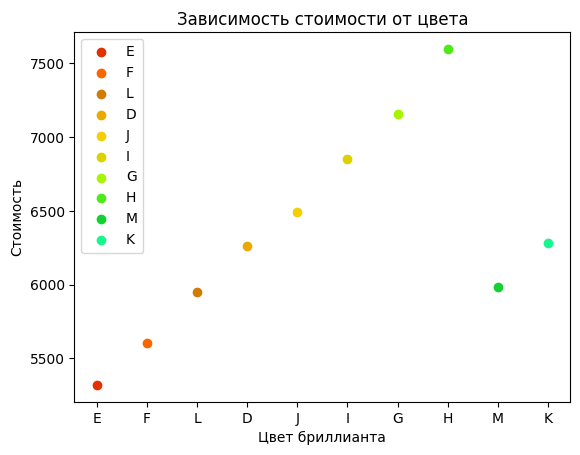

In [ ]:
x_label = 'Цвет бриллианта'
y_label = 'Стоимость'
title_ax = 'Зависимость стоимости от цвета'


values = {}
x_values = []
y_values = []
colors = ['#E03200','#F76600','#D17C00','#EBA800', '#F5CE00', '#DBD200','#A7F500', '#4BEB15', '#13D133', '#16F78F']
for index, row in diamonds.iterrows():
  if row['color'] != None and row['color'] != 'unknown':
    if values.get(row['color']) == None:
      values[row['color']] = {'cnt' : 1, 'price' : row['total_sales_price']}
    else:
      values[row['color']]['price'] += row['total_sales_price']
      values[row['color']]['cnt'] += 1

for key in values.keys():
  values[key]['price'] /= values[key]['cnt']
  x_values += [key]
  y_values += [values[key]['price']]

fig, ax = plt.subplots()

plt.title(title_ax)
plt.xlabel(x_label)
plt.ylabel(y_label)
for i in range(len(x_values)):
  ax.scatter(x_values[i], y_values[i], c=colors[i], label=x_values[i])
ax.legend()
plt.show()


(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

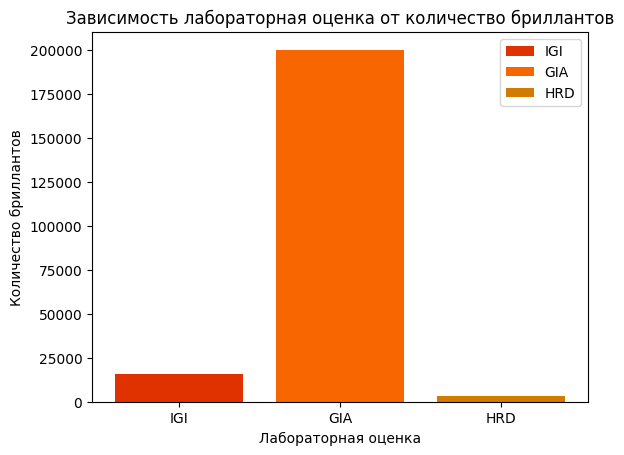

In [ ]:
x_label = 'Лабораторная оценка'
y_label = 'Количество бриллантов'
title_ax = 'Зависимость лабораторная оценка от количество бриллантов'


values = {}
x_values = []
y_values = []
colors = ['#E03200','#F76600','#D17C00','#EBA800', '#F5CE00', '#DBD200','#A7F500', '#4BEB15', '#13D133', '#16F78F']
for index, row in diamonds.iterrows():
  if row['lab'] != None and row['lab'] != 'unknown':
    if values.get(row['lab']) == None:
      values[row['lab']] = {'cnt' : 1, 'price' : row['total_sales_price']}
    else:
      values[row['lab']]['price'] += row['total_sales_price']
      values[row['lab']]['cnt'] += 1

for key in values.keys():
  x_values += [key]
  y_values += [values[key]['cnt']]

fig, ax = plt.subplots()

plt.title(title_ax)
plt.xlabel(x_label)
plt.ylabel(y_label)
for i in range(len(x_values)):
  ax.bar(x_values[i], y_values[i], color=colors[i], label=x_values[i])
ax.legend()
plt.show()


(2 балла) Постройте график `вес бриллианта - стоимость`:

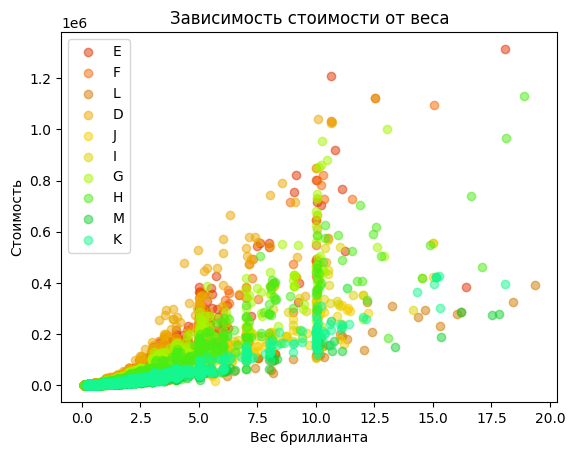

In [ ]:
x_label = 'Вес бриллианта'
y_label = 'Стоимость'
title_ax = 'Зависимость стоимости от веса'


values = []
x_values = {}
y_values = {}
colors = ['#E03200','#F76600','#D17C00','#EBA800', '#F5CE00', '#DBD200','#A7F500', '#4BEB15', '#13D133', '#16F78F']
for index, row in diamonds.iterrows():
  if row['carat_weight'] != None and row['carat_weight'] != 'unknown' and row['color'] != None and row['color']!='unknown':
    values += [[row['carat_weight'], row['total_sales_price'], row['color']]]

for key in values:
  if x_values.get(key[2]) == None:
    x_values[key[2]] = [key[0]]
    y_values[key[2]] = [key[1]]
  else:
    x_values[key[2]] += [key[0]]
    y_values[key[2]] += [key[1]]

fig, ax = plt.subplots()

plt.title(title_ax)
plt.xlabel(x_label)
plt.ylabel(y_label)
cnt = 0
for key in x_values:
  ax.scatter(x_values[key], y_values[key], c=colors[cnt], label=key, alpha=0.5)
  cnt+=1
  cnt%=10
ax.legend()
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

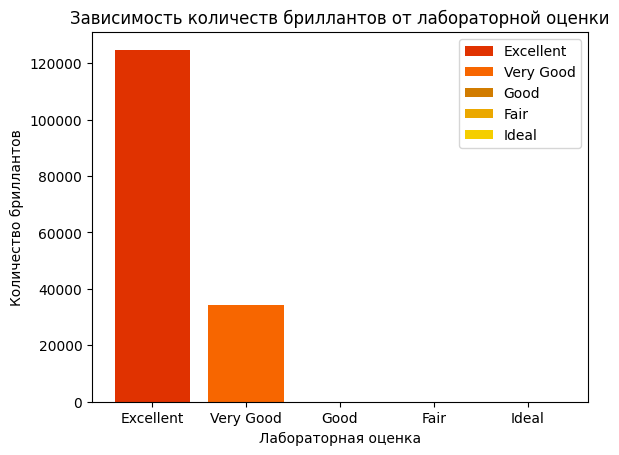

In [ ]:
x_label = 'Лабораторная оценка'
y_label = 'Количество бриллантов'
title_ax = 'Зависимость количеств бриллантов от лабораторной оценки'


values = {}
x_values = []
y_values = []
colors = ['#E03200','#F76600','#D17C00','#EBA800', '#F5CE00', '#DBD200','#A7F500', '#4BEB15', '#13D133', '#16F78F']
for index, row in diamonds.iterrows():
  if row['cut_quality'] != None and row['cut_quality'] != 'unknown':
    if values.get(row['cut_quality']) == None:
      values[row['cut_quality']] = {'cnt' : 1, 'price' : row['total_sales_price']}
    else:
      values[row['cut_quality']]['price'] += row['total_sales_price']
      values[row['cut_quality']]['cnt'] += 1

for key in values.keys():
  x_values += [key]
  y_values += [values[key]['cnt']]

fig, ax = plt.subplots()

plt.title(title_ax)
plt.xlabel(x_label)
plt.ylabel(y_label)
for i in range(len(x_values)):
  ax.bar(x_values[i], y_values[i], color=colors[i], label=x_values[i])
ax.legend()
plt.show()


(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

По данным графикам можно сделать несколько выводов. Во-первых, большая часть датасета содержит бриллианты качества Excellent, на которые в основном дает сертификат лаборатория института GIA. Во-вторых, большой разницы по цене, в зависимости от цвета, нет, но первенство держат бриллианты цвета "L". В-третьих, можно увидеть, что почти все бриллианты весят меньше 10 карат, примерно половина - меньше 5 карат, причем зависимость стоимости от веса нелинейна, а более похожа на квадратичную, что объясняет редкость бриллиантов большого веса

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [ ]:
classified_diamonds = diamonds.loc[:, ['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
classified_diamonds.loc[:10]

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [ ]:
classified_diamonds = classified_diamonds.sample(frac=1).reset_index(drop=True)
classified_diamonds

,meas_length,meas_width,meas_depth,total_sales_price
0,4.00,4.03,2.46,958
1,5.83,5.85,3.49,6410
2,8.01,4.76,2.96,3480
3,4.30,4.31,2.70,764
4,5.56,5.27,3.70,9459
...,...,...,...,...
219698,5.67,5.71,3.57,2982
219699,4.30,4.33,2.73,834
219700,5.63,5.67,3.50,2058
219701,0.00,0.00,0.00,1204


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [ ]:
column = []
for index, item in classified_diamonds.iterrows():
  column += [(abs(item[0]- item[1])**3 + abs(item[1] - item[2]) ** 3 + abs(item[2] - item[0])**3) ** (1/3)]
classified_diamonds['size'] = column

(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [ ]:
diamonds_size = classified_diamonds.loc[:, ['size', 'total_sales_price']]
diamonds_size

,size,total_sales_price
0,1.959362,958
1,2.960868,6410
2,5.528205,3480
3,2.022193,764
4,2.177817,9459
...,...,...
219698,2.671273,2982
219699,1.997156,834
219700,2.709068,2058
219701,0.000000,1204


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
diamonds_shaffled = classified_diamonds.sample(frac=1).reset_index(drop=True)
diamonds_train = diamonds_shaffled.loc[:len(diamonds_shaffled)//10*8]
diamonds_test = diamonds_shaffled.loc[len(diamonds_shaffled)//10*8:len(diamonds)]

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

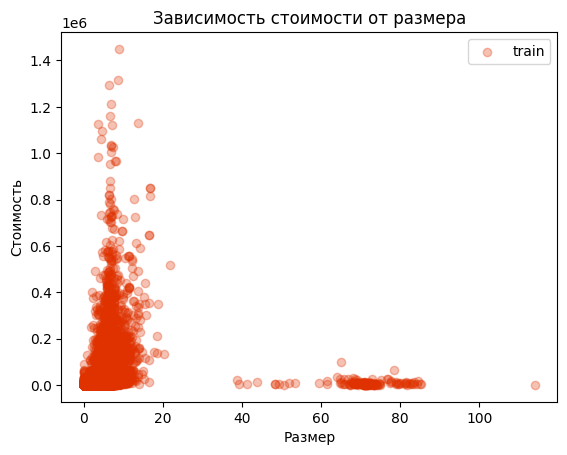

In [ ]:
x_label = 'Размер'
y_label = 'Стоимость'
title_ax = 'Зависимость стоимости от размера'


values = {}
values['train'] = []
values['test'] = []
x_values = []
y_values = []
colors = ['#E03200','#F76600','#D17C00','#EBA800', '#F5CE00', '#DBD200','#A7F500', '#4BEB15', '#13D133', '#16F78F']
for index, row in diamonds_train.iterrows():
  if row['size'] != None and row['size'] != 'unknown' and row['total_sales_price'] != None and row['total_sales_price']!='unknown':
    values['train'] += [[row['size'], row['total_sales_price']]]

for index, row in diamonds_test.iterrows():
  if row['size'] != None and row['size'] != 'unknown' and row['total_sales_price'] != None and row['total_sales_price']!='unknown':
    values['test'] += [[row['size'], row['total_sales_price']]]

for key in values['train']:
    x_values += [key[0]]
    y_values += [key[1]]

fig, ax = plt.subplots()

plt.title(title_ax)
plt.xlabel(x_label)
plt.ylabel(y_label)
ax.scatter(x_values, y_values, c='#E03200', label='train', alpha=0.3)
ax.legend()
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

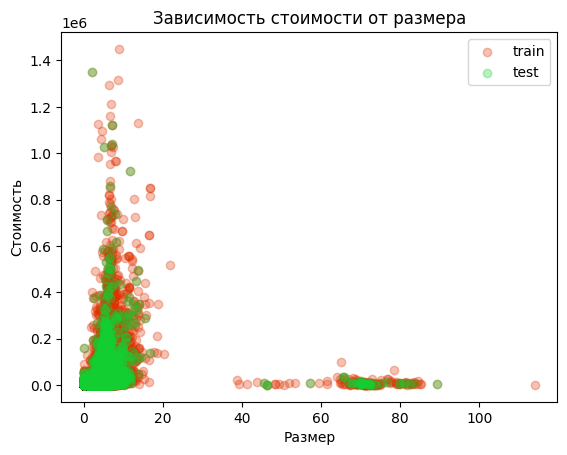

In [ ]:
fig, ax = plt.subplots()

plt.title(title_ax)
plt.xlabel(x_label)
plt.ylabel(y_label)
ax.scatter(x_values, y_values, c='#E03200', label='train', alpha=0.3)
x_values = []
y_values = []
for key in values['test']:
    x_values += [key[0]]
    y_values += [key[1]]

ax.scatter(x_values, y_values, c='#13D133', label='test', alpha=0.3)
ax.legend()
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [66]:
closest = []
cur_closest = 10000
for item in diamonds_test.loc[:,'size']:
  closest += [abs(diamonds_train.loc[:, 'size'] - item).argmin()]

diamonds_test.loc[:, 'lowest_difference'] = closest
diamonds_test


<ipython-input-66-217a6ca2c21d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_test.loc[:, 'lowest_difference'] = closest


,meas_length,meas_width,meas_depth,total_sales_price,size,lowest_difference,percantage
175760,6.37,6.42,3.98,6488,3.043040,15404,159.340321
175761,5.53,5.59,3.56,2386,2.520420,14476,114.082146
175762,6.83,6.89,4.31,13145,3.213250,11884,80.060860
175763,4.93,4.98,3.16,3060,2.262005,9721,31.895425
175764,5.69,5.67,4.07,8500,2.028552,80,6.988235
...,...,...,...,...,...,...,...
219698,6.92,6.96,4.35,9684,3.263392,1833,85.873606
219699,3.95,3.96,2.47,950,1.871004,950,84.000000
219700,6.77,3.73,2.17,580,5.055735,35800,755.689655
219701,5.21,3.83,2.45,596,2.973120,41349,404.697987


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [67]:
percentage = []
for index, row in diamonds_test.iterrows():
  percentage += [abs(1-(row[3] + diamonds_train.loc[:,'total_sales_price'][row[5]])/row[3]) * 100]

diamonds_test.loc[:,'percantage'] = percentage
diamonds_test

<ipython-input-67-bacaf8271568>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_test.loc[:,'percantage'] = percentage


,meas_length,meas_width,meas_depth,total_sales_price,size,lowest_difference,percantage
175760,6.37,6.42,3.98,6488,3.043040,15404,159.340321
175761,5.53,5.59,3.56,2386,2.520420,14476,114.082146
175762,6.83,6.89,4.31,13145,3.213250,11884,80.060860
175763,4.93,4.98,3.16,3060,2.262005,9721,31.895425
175764,5.69,5.67,4.07,8500,2.028552,80,6.988235
...,...,...,...,...,...,...,...
219698,6.92,6.96,4.35,9684,3.263392,1833,85.873606
219699,3.95,3.96,2.47,950,1.871004,950,84.000000
219700,6.77,3.73,2.17,580,5.055735,35800,755.689655
219701,5.21,3.83,2.45,596,2.973120,41349,404.697987


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)